In [11]:
# ================================
# Part 2: EDA & Preprocessing
# ================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



<>:6: SyntaxWarning: "\M" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\M"? A raw string is also an option.
<>:6: SyntaxWarning: "\M" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\M"? A raw string is also an option.
C:\Users\WIN10\AppData\Local\Temp\ipykernel_7660\3098596803.py:6: SyntaxWarning: "\M" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\M"? A raw string is also an option.
  df = pd.read_csv('C:\ML CAPSTONE\data\dataset_heart.csv')


Shape of dataset: (270, 14)

Data Types:
 age                                       int64
sex                                       int64
chest pain type                           int64
resting blood pressure                    int64
serum cholestoral                         int64
fasting blood sugar                       int64
resting electrocardiographic results      int64
max heart rate                            int64
exercise induced angina                   int64
oldpeak                                 float64
st segment                                int64
major vessels                             int64
thal                                      int64
heart disease                             int64
dtype: object

First 5 rows:
    age  sex  chest pain type  resting blood pressure  serum cholestoral  \
0   70    1                4                     130                322   
1   67    0                3                     115                564   
2   57    1                2   

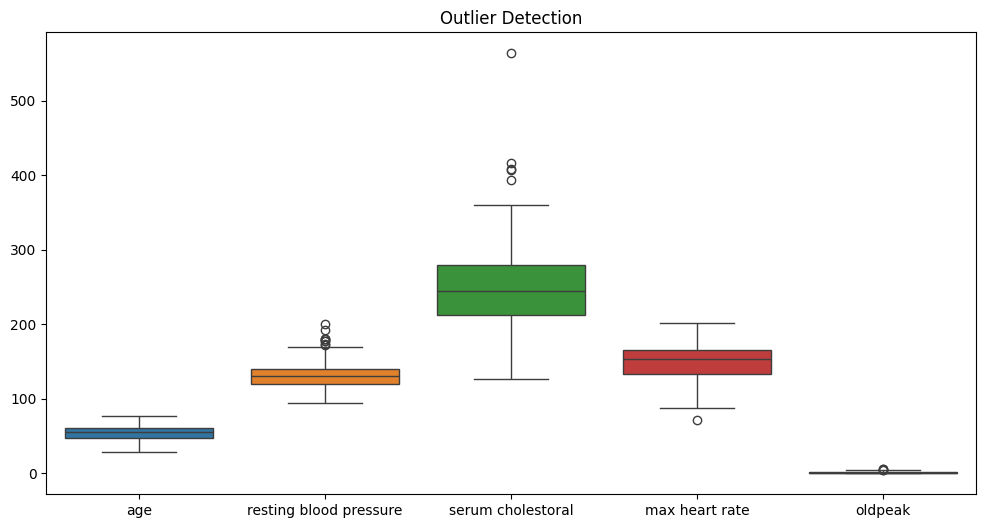

Train shape: (216, 20)
Test shape: (54, 20)
Index(['age', 'resting blood pressure', 'serum cholestoral', 'max heart rate',
       'oldpeak', 'heart disease', 'sex_1', 'chest pain type_2',
       'chest pain type_3', 'chest pain type_4', 'fasting blood sugar_1',
       'resting electrocardiographic results_1',
       'resting electrocardiographic results_2', 'exercise induced angina_1',
       'st segment_2', 'st segment_3', 'major vessels_1', 'major vessels_2',
       'major vessels_3', 'thal_6', 'thal_7'],
      dtype='object')

Target distribution:
 heart disease
1    150
2    120
Name: count, dtype: int64


In [12]:
# -------------------------------
# 2. Load Dataset
# -------------------------------

# Load the Heart Disease dataset
df = pd.read_csv('C:\ML CAPSTONE\data\dataset_heart.csv')
# Clean column names
df.columns = df.columns.str.strip().str.lower()

# -------------------------------
# 3. Initial Inspection
# -------------------------------

# Display dataset shape (rows, columns)
print("Shape of dataset:", df.shape)

# Display data types of each column
print("\nData Types:\n", df.dtypes)

# Display first 5 rows of the dataset
print("\nFirst 5 rows:\n", df.head())


# Target Distribution
# -------------------------------
print("\nTarget distribution:\n", df['heart disease'].value_counts())


# Missing Values Handling (Safety Step)
# -------------------------------
print("\nMissing values per column:\n", df.isnull().sum())

for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

print("\nMissing values after handling:\n", df.isnull().sum())


# -------------------------------
# Categorical Feature Encoding
# -------------------------------
cat_cols = [
    'sex',
    'chest pain type',
    'fasting blood sugar',
    'resting electrocardiographic results',
    'exercise induced angina',
    'st segment',
    'major vessels',
    'thal'
]

df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


# -------------------------------
# 4. Column Name Cleaning
# -------------------------------

# Clean column names: remove spaces and convert to lowercase
df.columns = df.columns.str.strip().str.lower()



# -------------------------------
# Outlier Visualization (Only Visualization)
# -------------------------------
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[
    ['age',
     'resting blood pressure',
     'serum cholestoral',
     'max heart rate',
     'oldpeak']
])
plt.title('Outlier Detection')
plt.show()

# -------------------------------
# Feature Scaling (for later use)
# -------------------------------
X = df.drop('heart disease', axis=1)
y = df['heart disease']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)



# Display cleaned column names
print(df.columns)


# -------------------------------
# 5. Target Variable Inspection
# -------------------------------

# In heart disease datasets, the target column is often named
# 'target' or 'heart disease'
print("\nTarget distribution:\n", df['heart disease'].value_counts())

MSE: 75.93356210572085
RMSE: 8.713986579386088
R2 Score: 0.04448989738024056


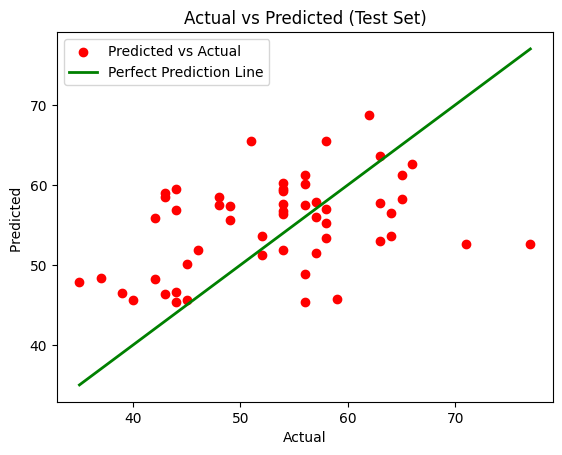

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Split features and target
y = df['age']
X = df.drop(columns=[
    'age'
    ,'heart disease'
])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

# Visualization
plt.scatter(y_test, y_pred, color="red", label="Predicted vs Actual")
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color="green",
    linewidth=2,
    label="Perfect Prediction Line"
)
plt.xlabel("Actual")
plt.ylabel("Predicted ")
plt.title("Actual vs Predicted (Test Set)")
plt.legend()
plt.show()


Accuracy: 0.8703703703703703
Precision: 0.8148148148148148
Recall: 0.9166666666666666


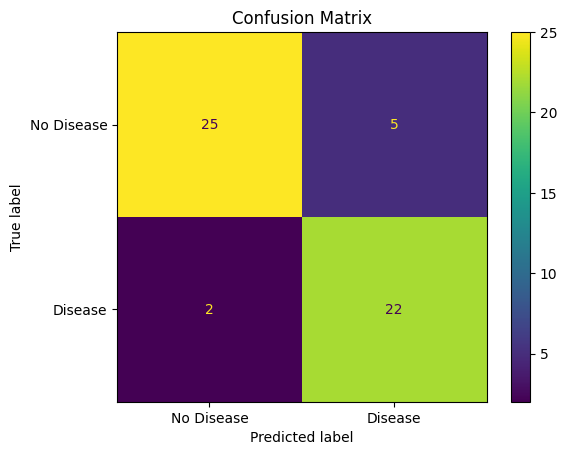

In [16]:
# ================================
# Classification: Heart Disease
# ================================

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Target Mapping (FIXED POSITION)
# -------------------------------
df['heart disease'] = df['heart disease'].map({1: 0, 2: 1})

y = df['heart disease']
X = df.drop(columns=['heart disease'])

# -------------------------------
# Feature Scaling (FIXED)
# -------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------------
# Train-Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# -------------------------------
# Train Model
# -------------------------------
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

# -------------------------------
# Evaluation
# -------------------------------
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm,
    display_labels=["No Disease", "Disease"]
).plot()
plt.title("Confusion Matrix")
plt.show()


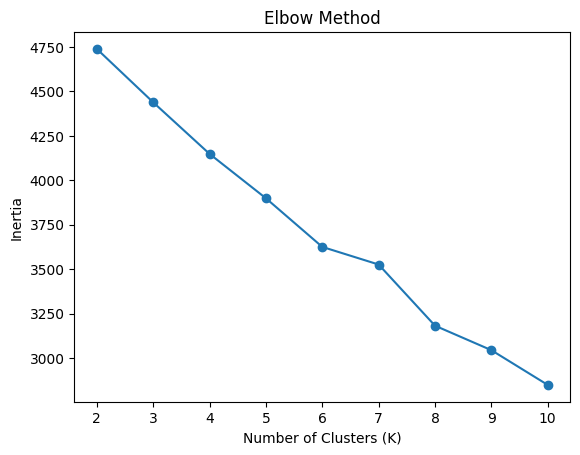

Silhouette Score: 0.1269729787759812


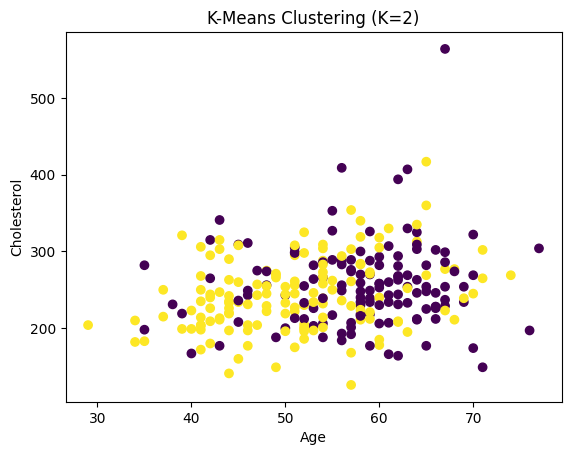

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


X = df.drop(columns=['heart disease'])

# =========================
# 2. Scaling
# =========================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# =========================
# 3. Elbow Method
# =========================
inertia = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

# =========================
# 5. Silhouette Score
# =========================
score = silhouette_score(X_scaled, labels)
print("Silhouette Score:", score)

# =========================
# 6. Visualization
# Choose two key features for plotting
# =========================
plt.scatter(df['age'], df['serum cholestoral'], c=labels, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title(f"K-Means Clustering (K={optimal_k})")
plt.show()


<>:18: SyntaxWarning: "\M" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\M"? A raw string is also an option.
<>:18: SyntaxWarning: "\M" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\M"? A raw string is also an option.
C:\Users\WIN10\AppData\Local\Temp\ipykernel_7660\3264972133.py:18: SyntaxWarning: "\M" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\M"? A raw string is also an option.
  df = pd.read_csv('C:\ML CAPSTONE\data\dataset_heart.csv')


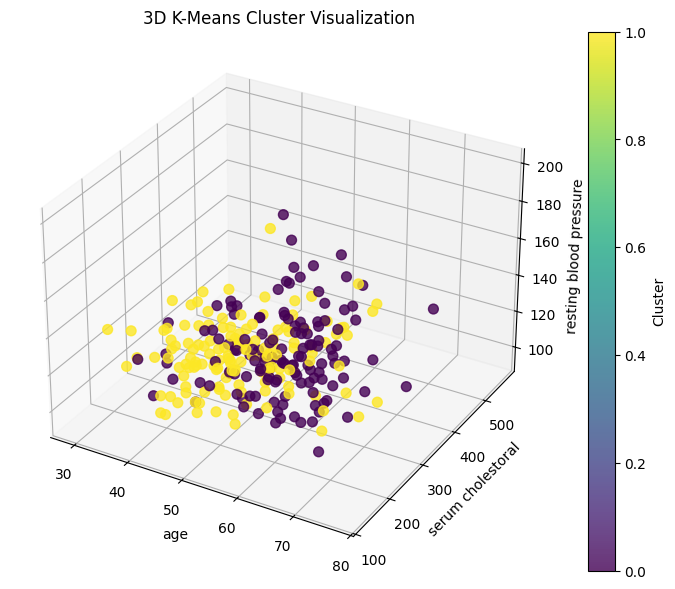

In [19]:
# ================================
# 3D Visualization of Clusters
# ================================


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# -------------------------------
# Reload dataset (independent task)
# -------------------------------
df = pd.read_csv('C:\ML CAPSTONE\data\dataset_heart.csv')
df.columns = df.columns.str.strip().str.lower()

cat_cols = [
    'sex','chest pain type','fasting blood sugar',
    'resting electrocardiographic results',
    'exercise induced angina','st segment',
    'major vessels','thal'
]
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# -------------------------------
# Prepare Features (No Target)
# -------------------------------
X = df.drop(columns=['heart disease'])

# -------------------------------
# Feature Scaling
# -------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------------
#  (K = 2 )
# -------------------------------
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

# -------------------------------
# 3D Visualization
# -------------------------------
features_3d = ['age', 'serum cholestoral', 'resting blood pressure']

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df[features_3d[0]],
    df[features_3d[1]],
    df[features_3d[2]],
    c=labels,
    cmap='viridis',
    s=50,
    alpha=0.8
)

ax.set_xlabel(features_3d[0])
ax.set_ylabel(features_3d[1])
ax.set_zlabel(features_3d[2])
ax.set_title('3D K-Means Cluster Visualization')

plt.colorbar(scatter, ax=ax, label='Cluster')
plt.show()